In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os


warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## LOADING DATA


In [184]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
training_data_path = os.path.join(project_root, "Data", "customer_churn_dataset-training-master.csv")
testing_data_path = os.path.join(project_root, "Data", "customer_churn_dataset-testing-master.csv")

df_train = pd.read_csv(training_data_path)
df_test = pd.read_csv(testing_data_path)
df_train.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [155]:
df_test[1:20]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0
10,11,46,Female,42,27,9,21,Standard,Annual,526,3,1


In [185]:
from sklearn.utils import shuffle
df_train = shuffle(df_train, random_state=42).reset_index(drop=True)
df_test = shuffle(df_test, random_state=42).reset_index(drop=True)

In [121]:
df_train.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,71073.0,27.0,Male,14.0,28.0,3.0,16.0,Standard,Monthly,862.00,9.0,1.0
1,230192.0,40.0,Male,19.0,2.0,8.0,28.0,Standard,Monthly,620.81,21.0,1.0
2,22407.0,27.0,Female,57.0,3.0,0.0,24.0,Standard,Annual,915.00,26.0,1.0
3,290822.0,40.0,Male,21.0,14.0,0.0,11.0,Basic,Annual,592.83,9.0,0.0
4,172430.0,39.0,Male,58.0,4.0,2.0,8.0,Standard,Monthly,694.00,15.0,1.0
5,263612.0,24.0,Male,49.0,29.0,2.0,5.0,Basic,Quarterly,992.95,17.0,0.0
6,436343.0,35.0,Male,25.0,21.0,2.0,1.0,Premium,Quarterly,797.47,9.0,0.0
7,73352.0,52.0,Female,50.0,22.0,10.0,4.0,Basic,Annual,187.00,9.0,1.0
8,56652.0,41.0,Female,20.0,22.0,0.0,15.0,Basic,Monthly,814.00,6.0,1.0
9,346111.0,22.0,Female,33.0,24.0,0.0,11.0,Standard,Quarterly,707.09,10.0,0.0


## EDA

In [122]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [123]:
df_train.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [124]:
df_missing = df_train[df_train.isna().all(axis=1)]
df_missing


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [186]:
df_train.dropna(inplace=True)
df_train.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [187]:
df_train.duplicated().sum()

np.int64(0)

In [188]:
print(df_train.shape)
print(df_test.shape)

(440832, 12)
(64374, 12)


In [189]:
df_train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [190]:
df_train["Churn"].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [191]:
df_train.drop(columns=["CustomerID"], inplace=True)
df_test.drop(columns=["CustomerID"], inplace=True)
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,27.0,Male,14.0,28.0,3.0,16.0,Standard,Monthly,862.00,9.0,1.0
1,40.0,Male,19.0,2.0,8.0,28.0,Standard,Monthly,620.81,21.0,1.0
2,27.0,Female,57.0,3.0,0.0,24.0,Standard,Annual,915.00,26.0,1.0
3,40.0,Male,21.0,14.0,0.0,11.0,Basic,Annual,592.83,9.0,0.0
4,39.0,Male,58.0,4.0,2.0,8.0,Standard,Monthly,694.00,15.0,1.0


In [192]:
df_categorical = df_train.select_dtypes(include="object")
df_numerical = df_train.select_dtypes(include="float64")
df_numerical.drop(columns=["Churn"], inplace=True)
df_numerical.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction'],
      dtype='object')

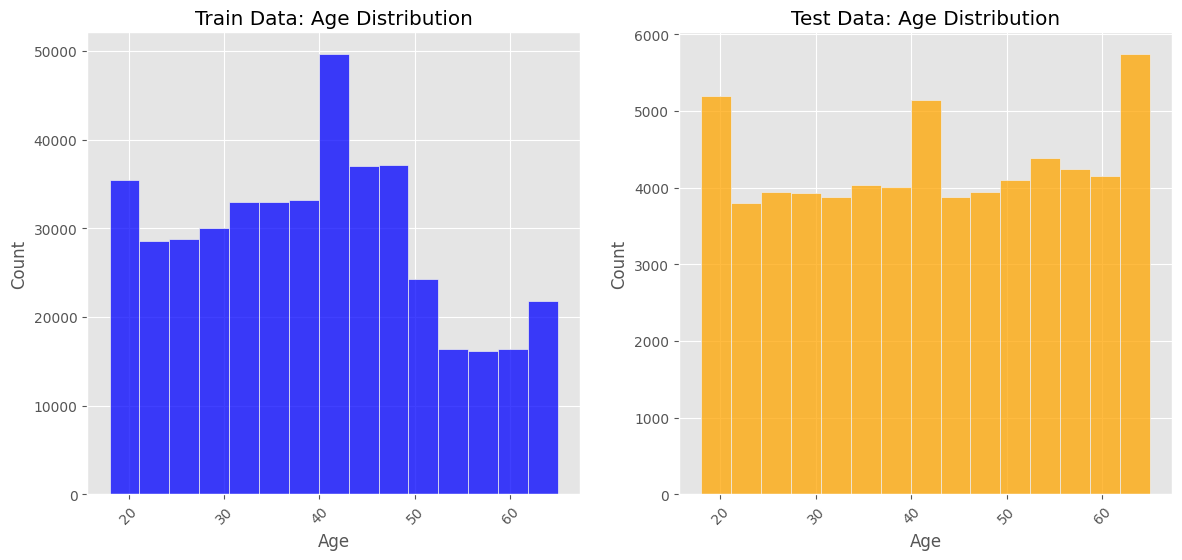

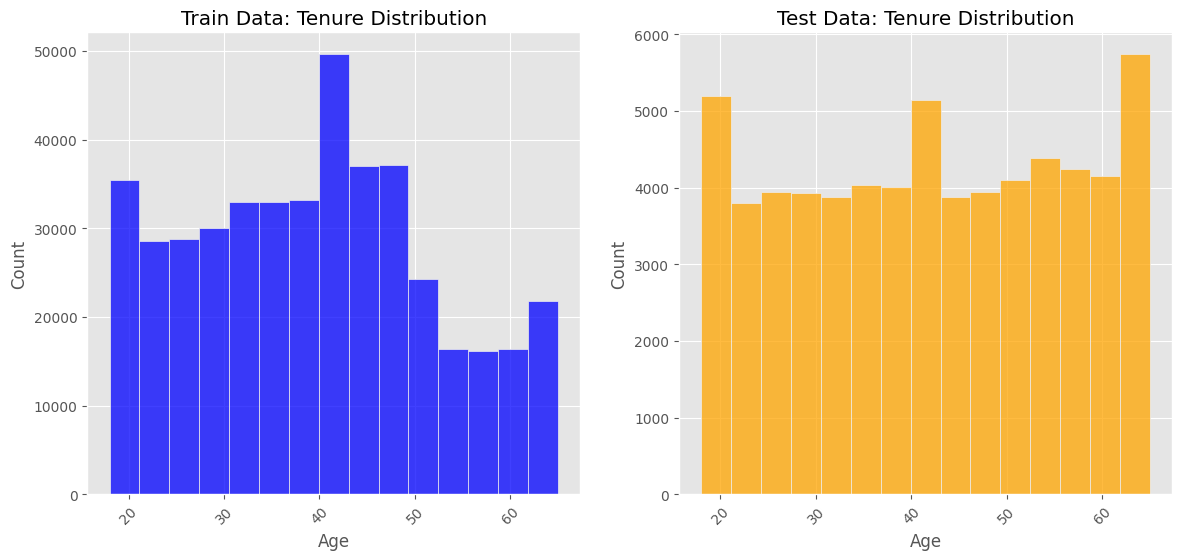

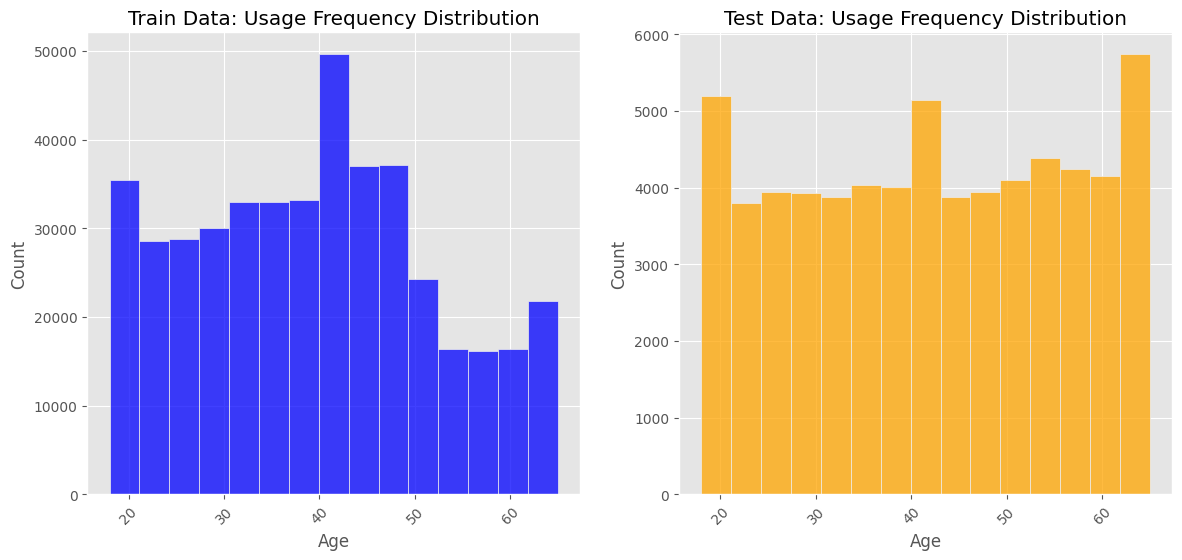

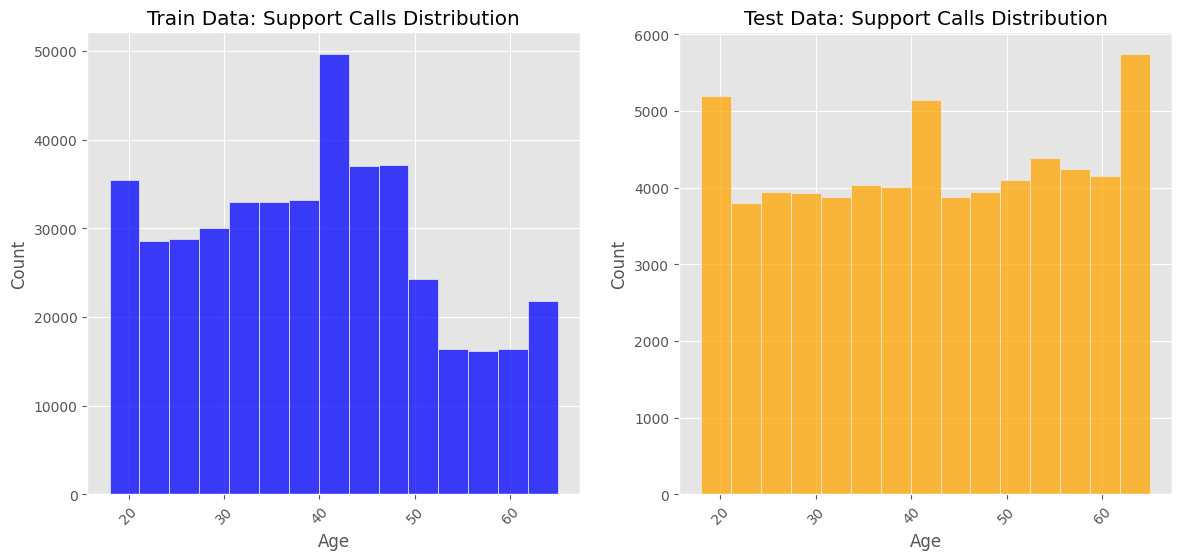

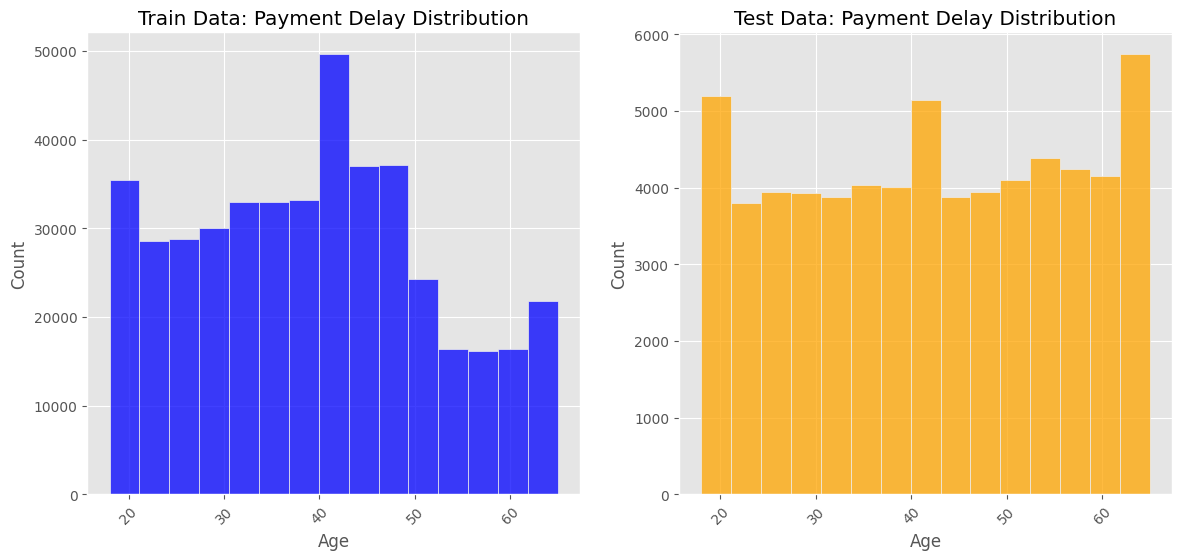

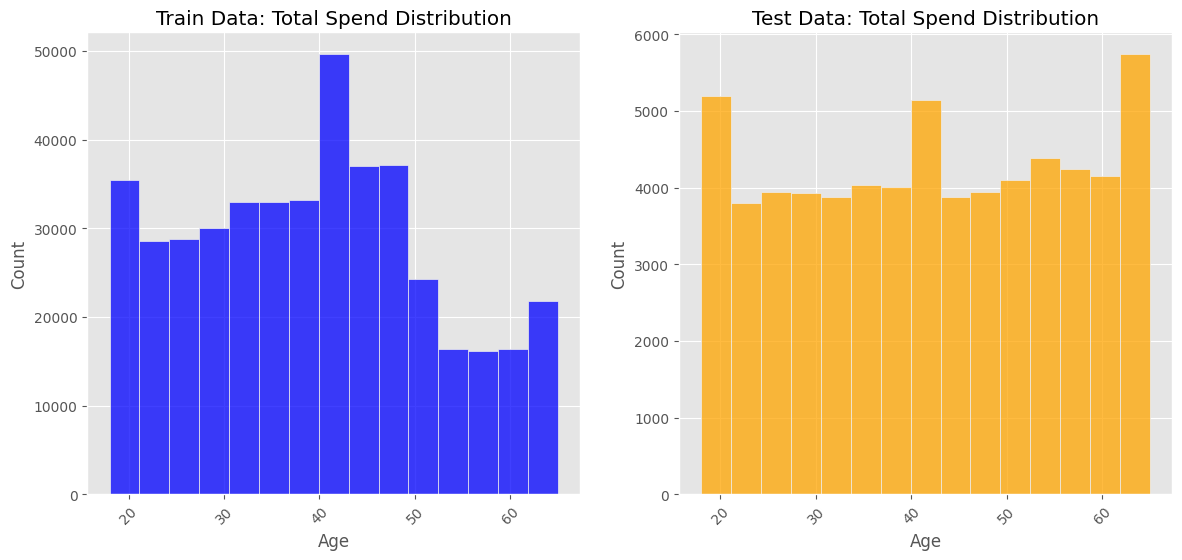

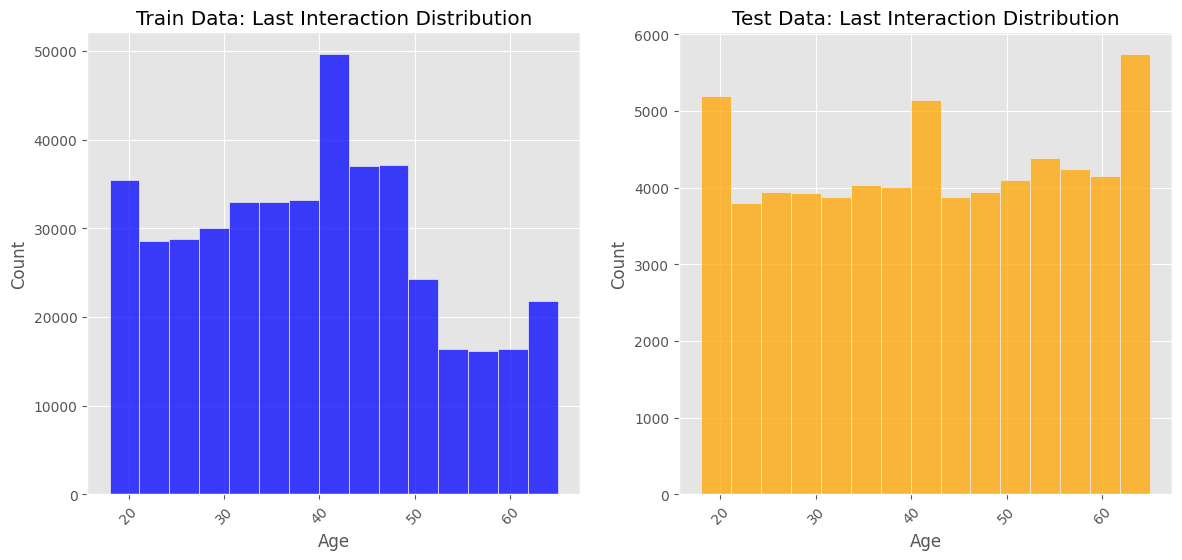

In [175]:
for col in df_numerical:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
    sns.histplot(df_train , x = "Age" , bins = 15 , ax = axes[0] , color="blue")
    axes[0].set_title(f"Train Data: {col} Distribution")
    axes[0].tick_params(axis='x', rotation=45)
    
    sns.histplot(df_test , x = "Age" , bins = 15 , ax = axes[1] , color="orange")
    axes[1].set_title(f"Test Data: {col} Distribution")
    axes[1].tick_params(axis='x', rotation=45)
    plt.show()

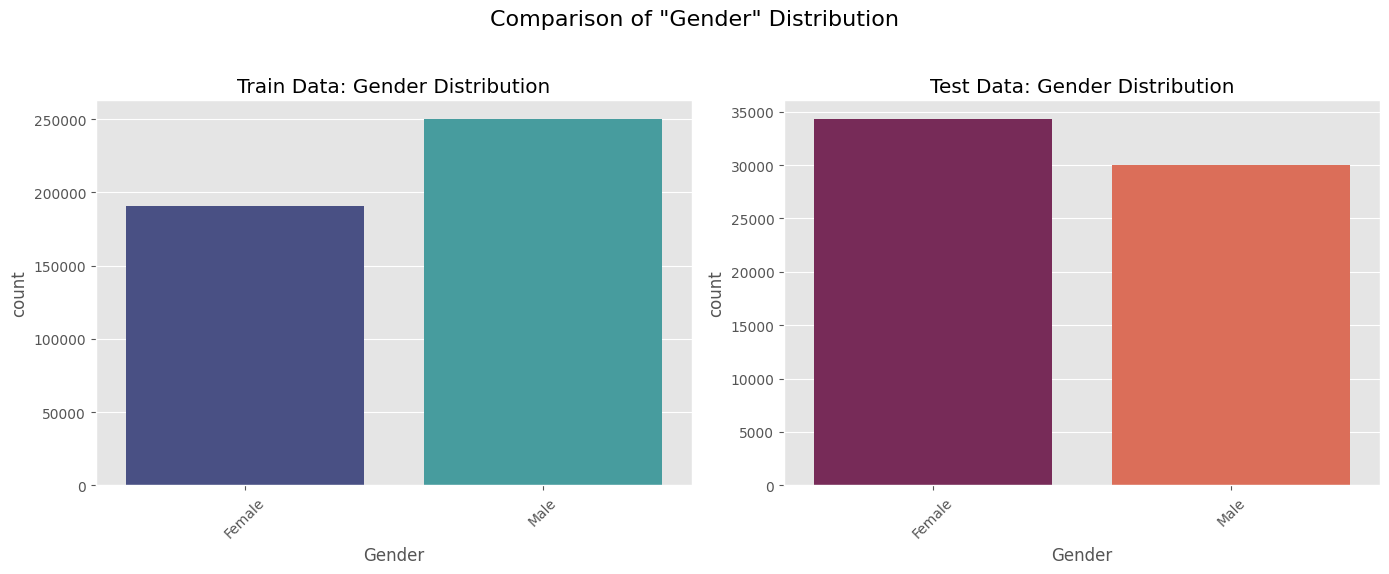

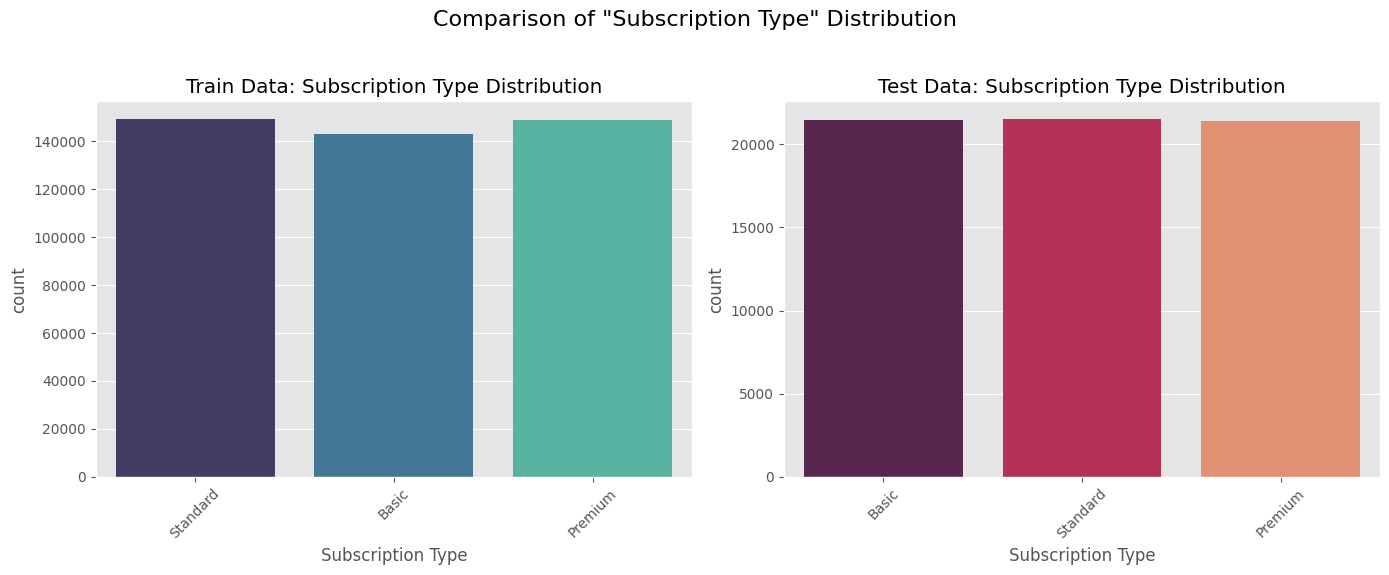

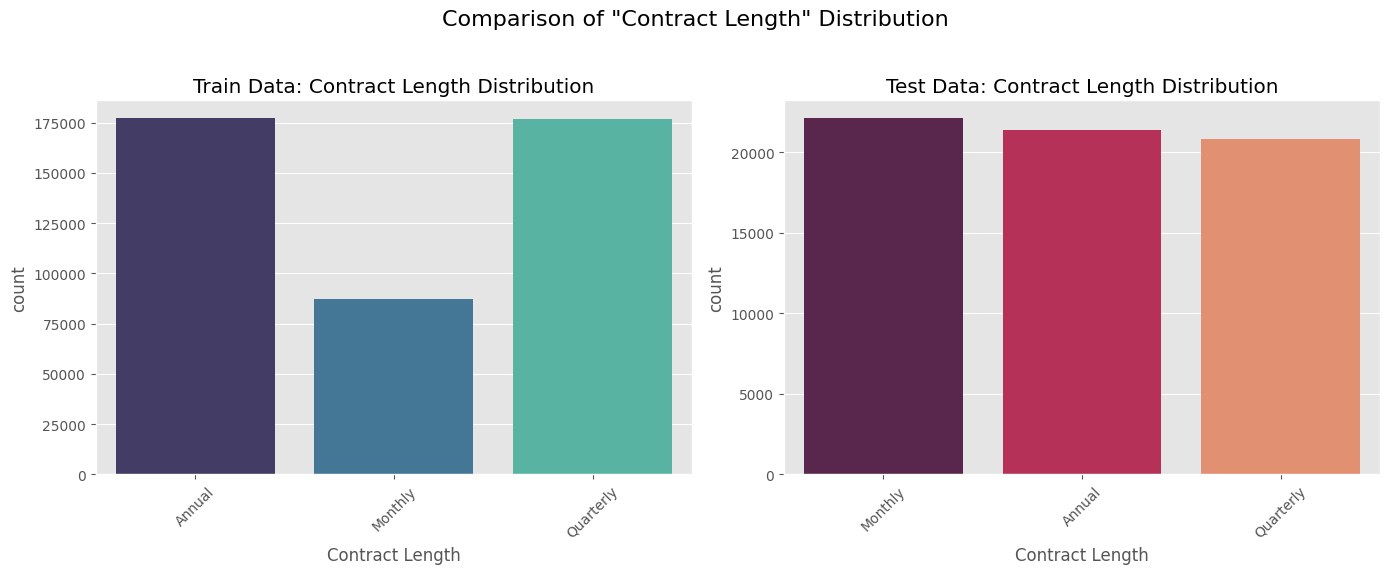

In [177]:

for col in df_categorical.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    

    sns.countplot(data=df_train, x=col, ax=axes[0], palette="mako")
    axes[0].set_title(f'Train Data: {col} Distribution')
    axes[0].tick_params(axis='x', rotation=45)

    sns.countplot(data=df_test, x=col, ax=axes[1], palette="rocket")
    axes[1].set_title(f'Test Data: {col} Distribution')
    axes[1].tick_params(axis='x', rotation=45)

    fig.suptitle(f'Comparison of "{col}" Distribution', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

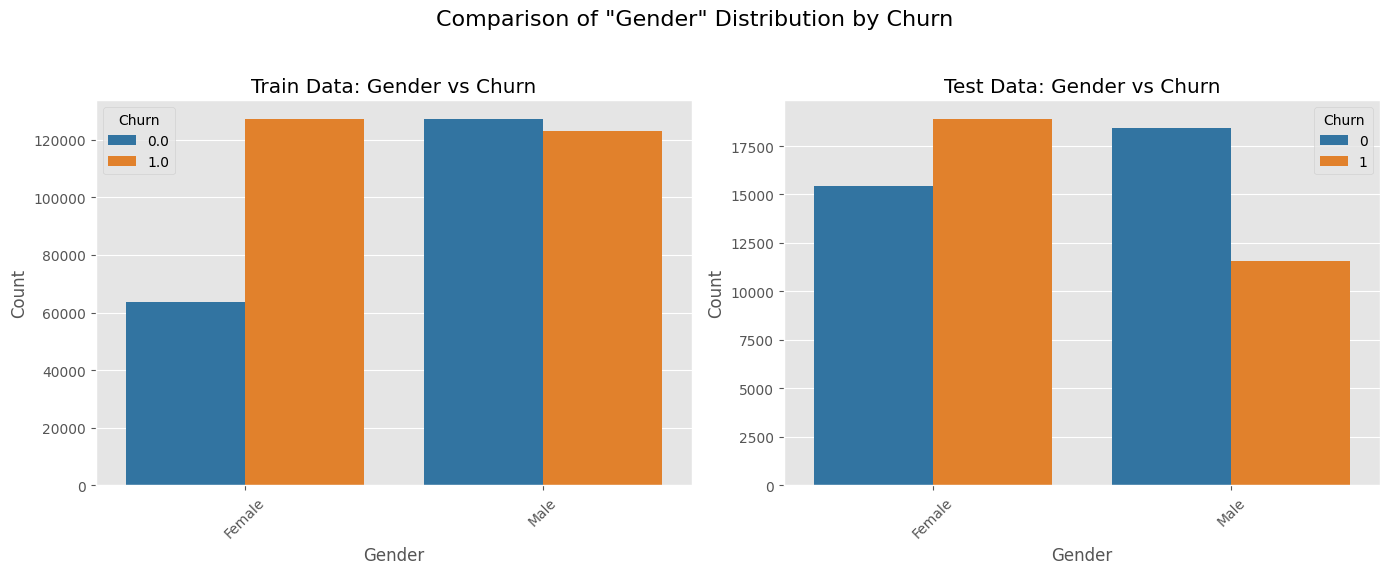

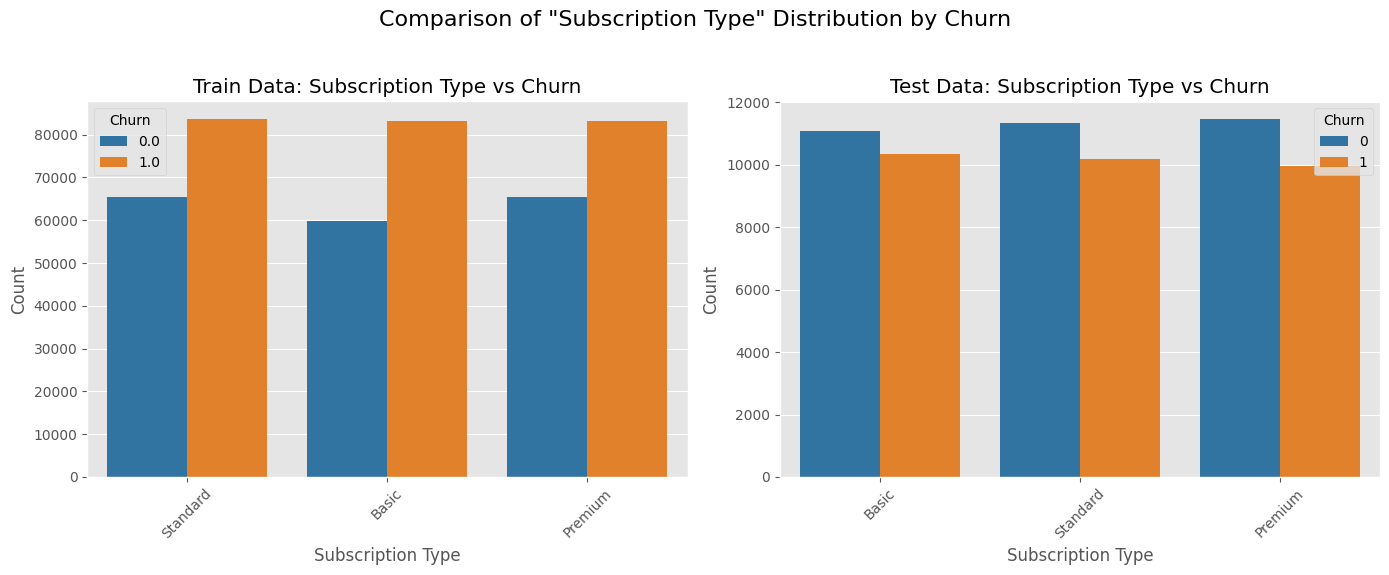

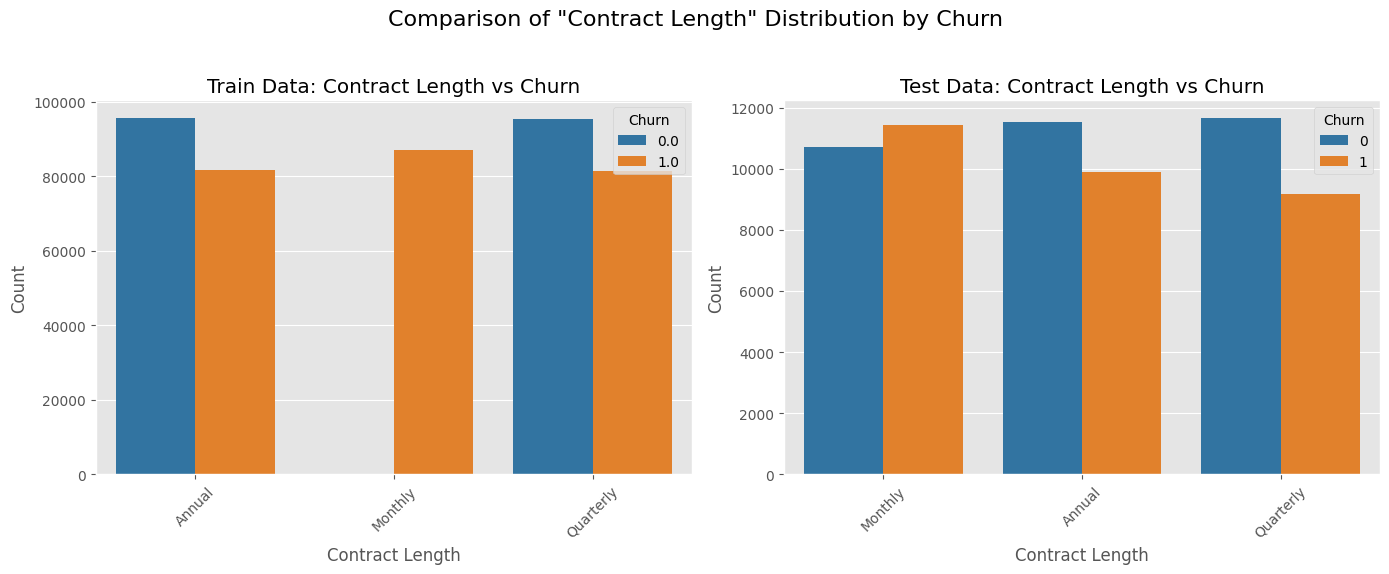

In [166]:

for col in df_categorical.columns:

    fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 


    sns.countplot(data=df_train, x=col, hue="Churn", ax=axes[0], palette="tab10")
    axes[0].set_title(f'Train Data: {col} vs Churn')
    axes[0].set_ylabel('Count') 
    axes[0].tick_params(axis='x', rotation=45)


    sns.countplot(data=df_test, x=col, hue="Churn", ax=axes[1], palette="tab10")
    axes[1].set_title(f'Test Data: {col} vs Churn')
    axes[1].set_ylabel('Count') 
    axes[1].tick_params(axis='x', rotation=45)

    
    fig.suptitle(f'Comparison of "{col}" Distribution by Churn', fontsize=16)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Insights from Categorical Analysis

### Gender Distribution
- Among **female customers**, around **66.7% churned** compared to **33.3% retained**.  
- Among **male customers**, churn is more balanced: **49.1% churned** and **50.9% retained**.  
➡️ **Insight:** Female customers are more likely to churn than male customers.  

### Subscription Type Distribution
- **Basic plan:** 58.2% churn rate.  
- **Standard plan:** 56.1% churn rate.  
- **Premium plan:** 55.9% churn rate.  
➡️ **Insight:** Churn rate is high across all subscription types, but slightly lower for Premium customers.  

### Contract Length Distribution
- **Monthly contracts:** show **100% churn**, meaning no monthly customers are retained.  
- **Annual contracts:** 46.1% churn, 53.9% retention.  
- **Quarterly contracts:** 46.0% churn, 54.0% retention.  
➡️ **Insight:** Longer-term contracts (annual or quarterly) strongly reduce churn compared to monthly contracts.  


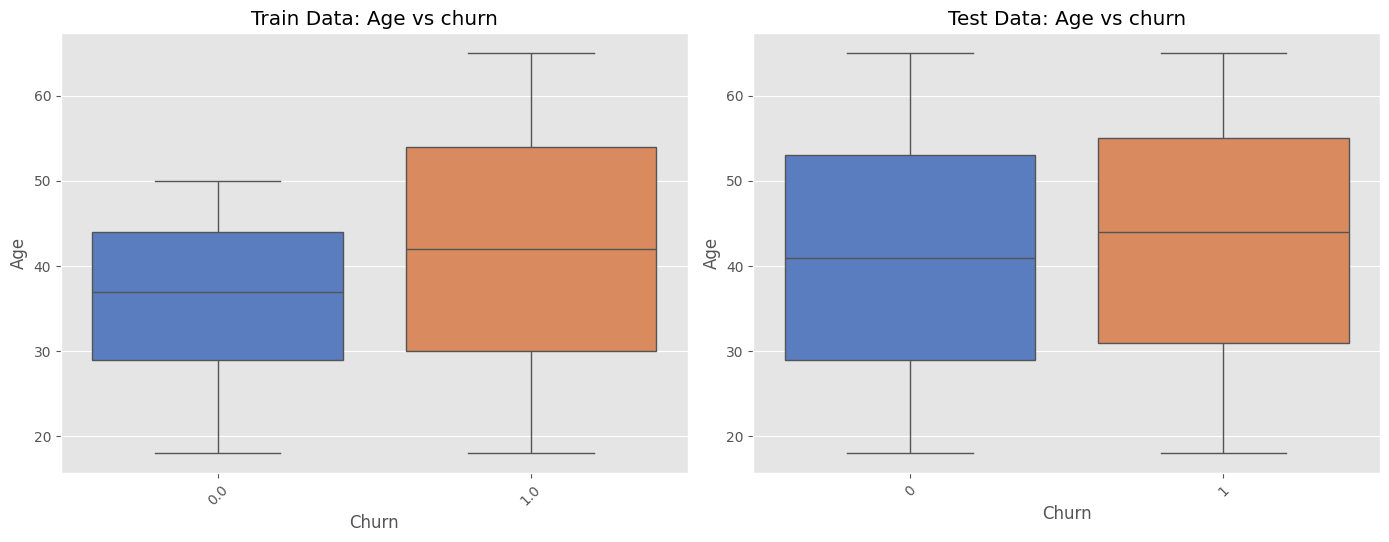

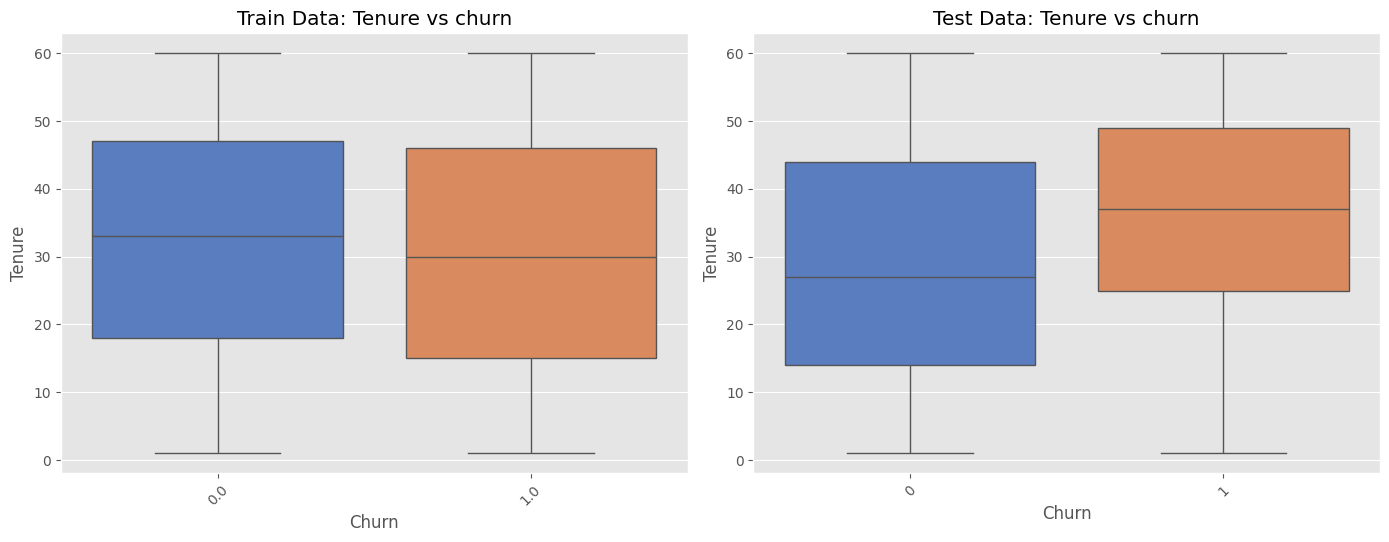

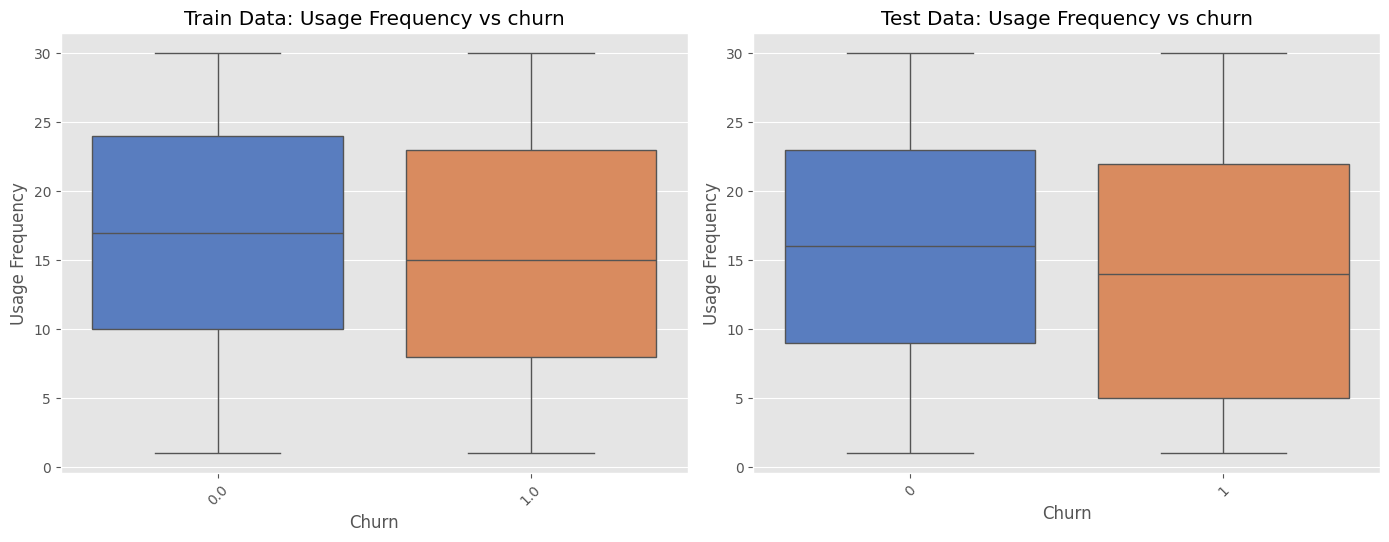

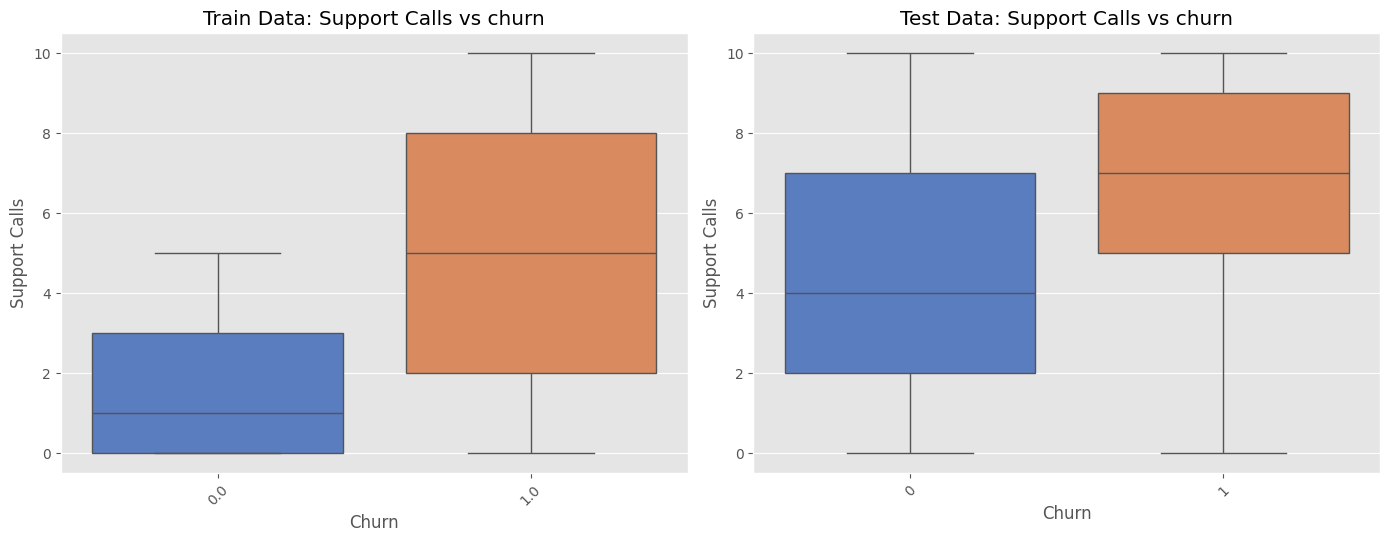

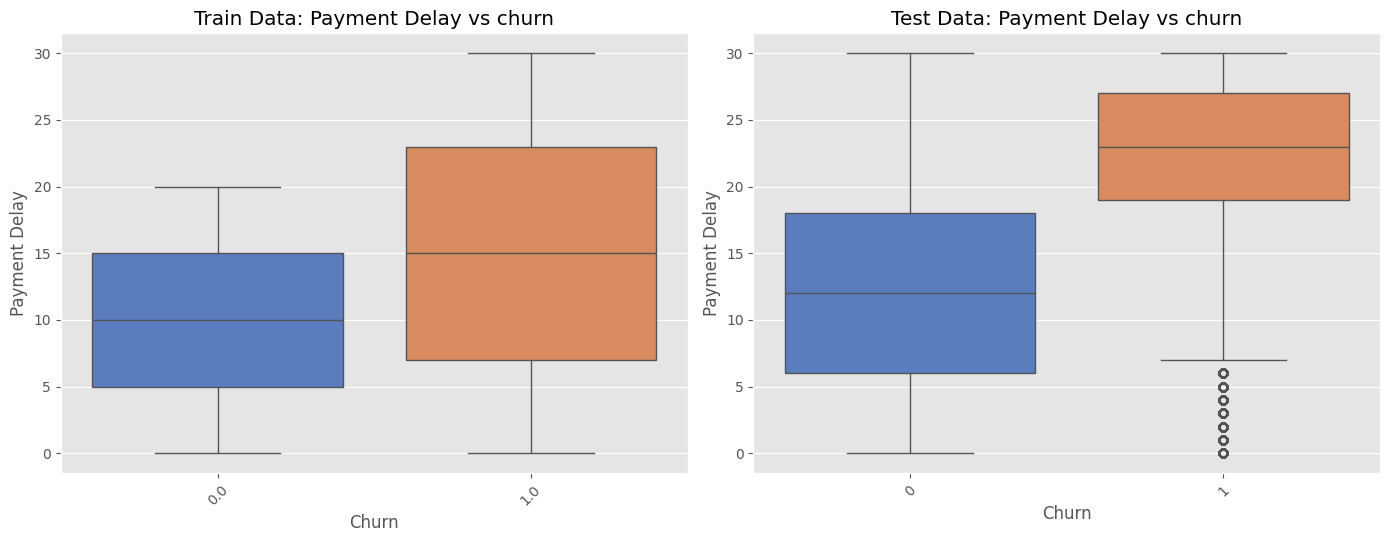

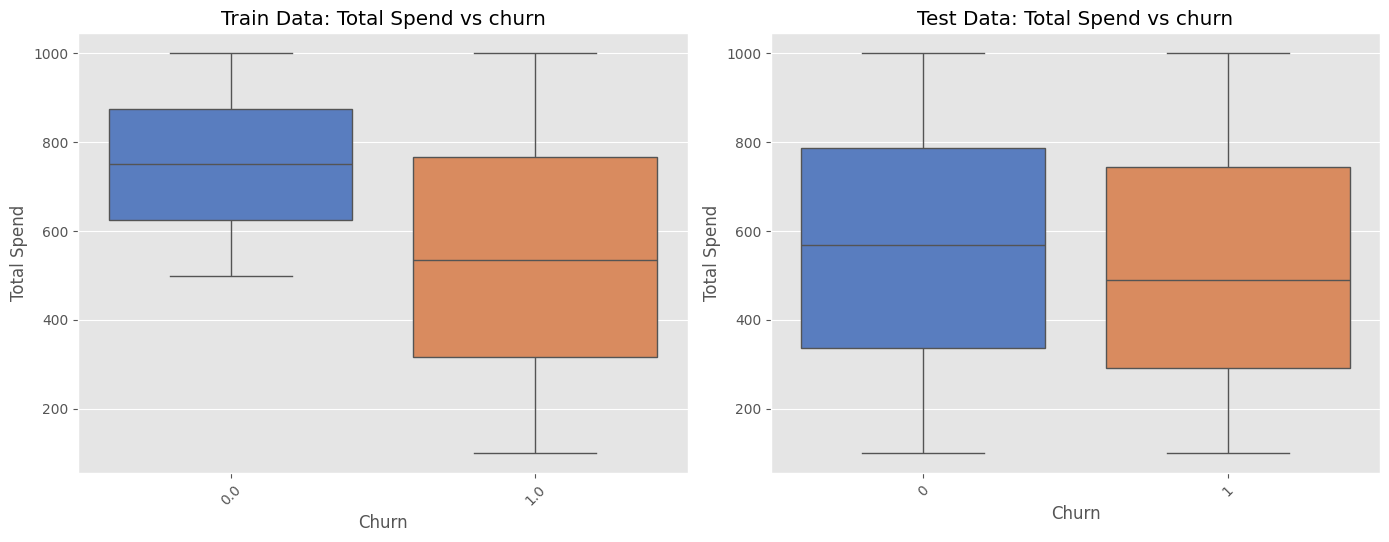

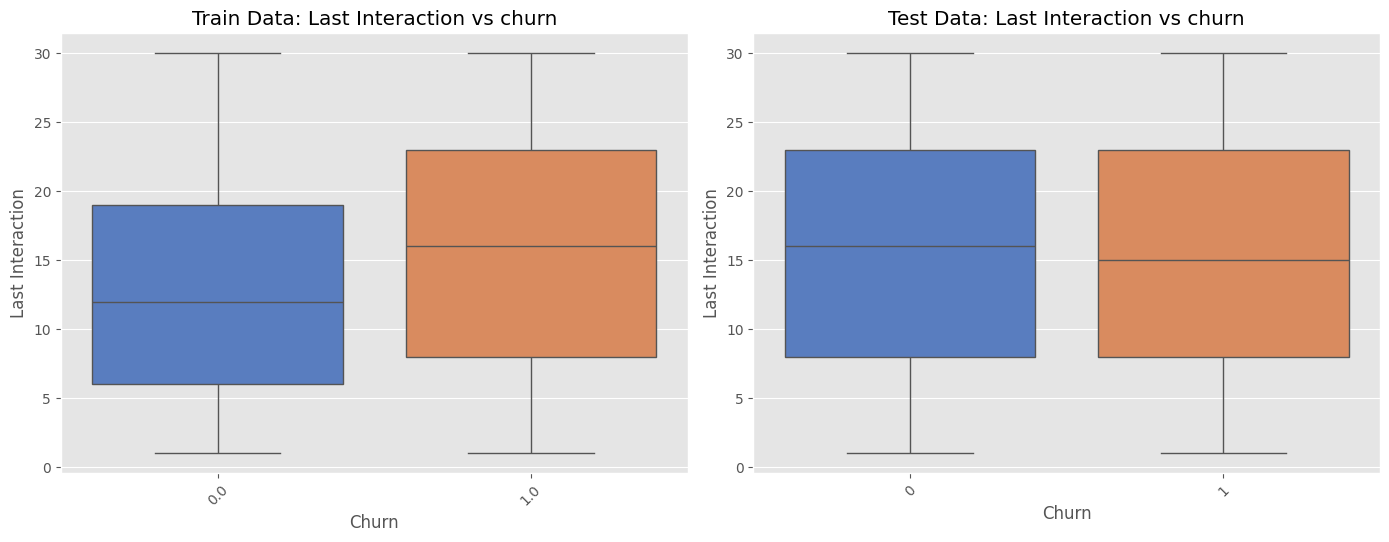

In [169]:
for col in df_numerical:
    fig , axes = plt.subplots(1,2,figsize=(14, 6))
    sns.boxplot(data=df_train, x="Churn", y=col, palette="muted" , ax = axes[0])
    axes[0].set_title(f'Train Data: {col} vs churn')
    axes[0].tick_params(axis='x', rotation=45)

    sns.boxplot(data=df_test, x="Churn", y=col, palette="muted" , ax = axes[1])
    axes[1].set_title(f'Test Data: {col} vs churn')
    axes[1].tick_params(axis='x', rotation=45)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


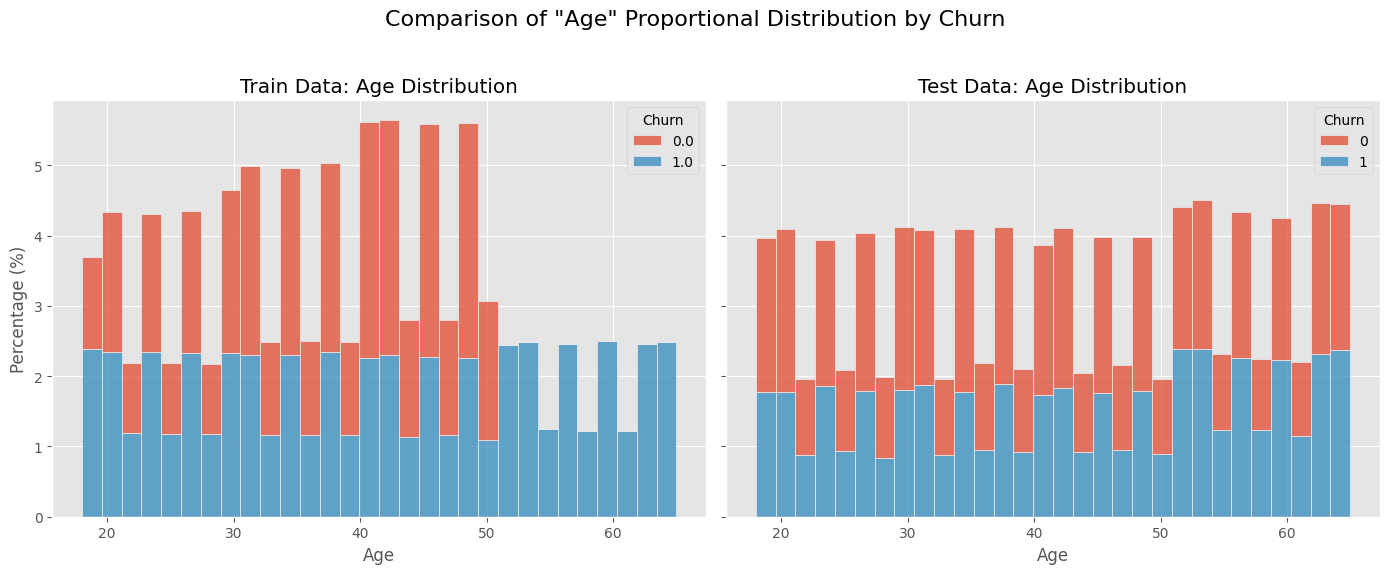

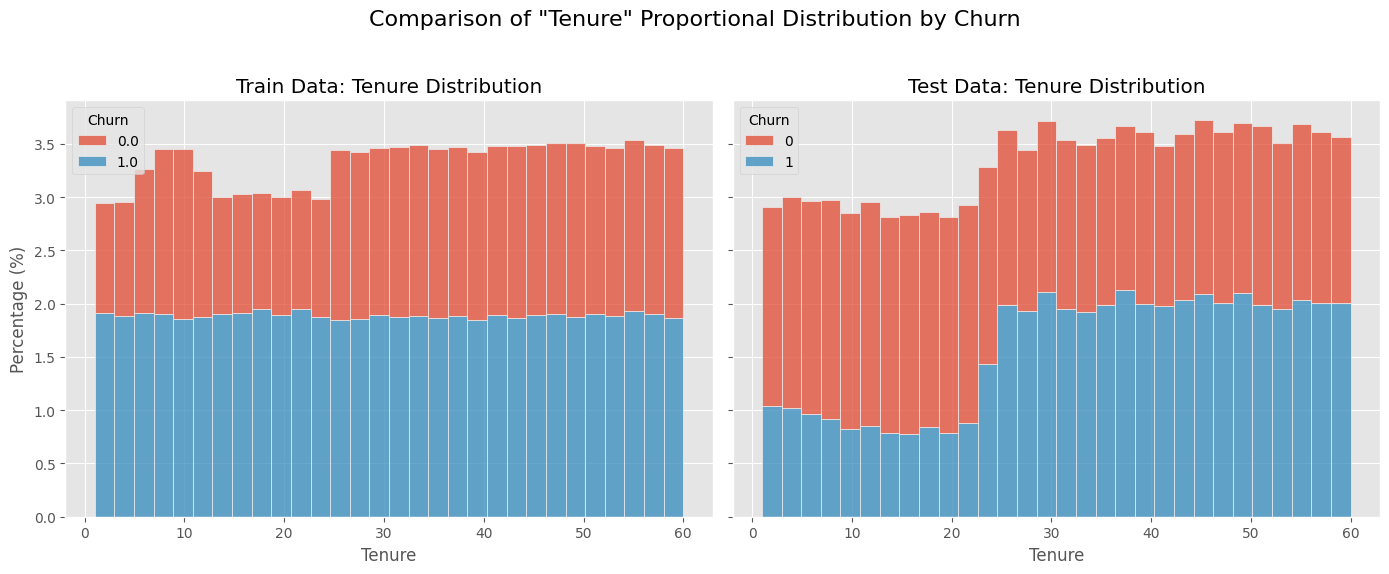

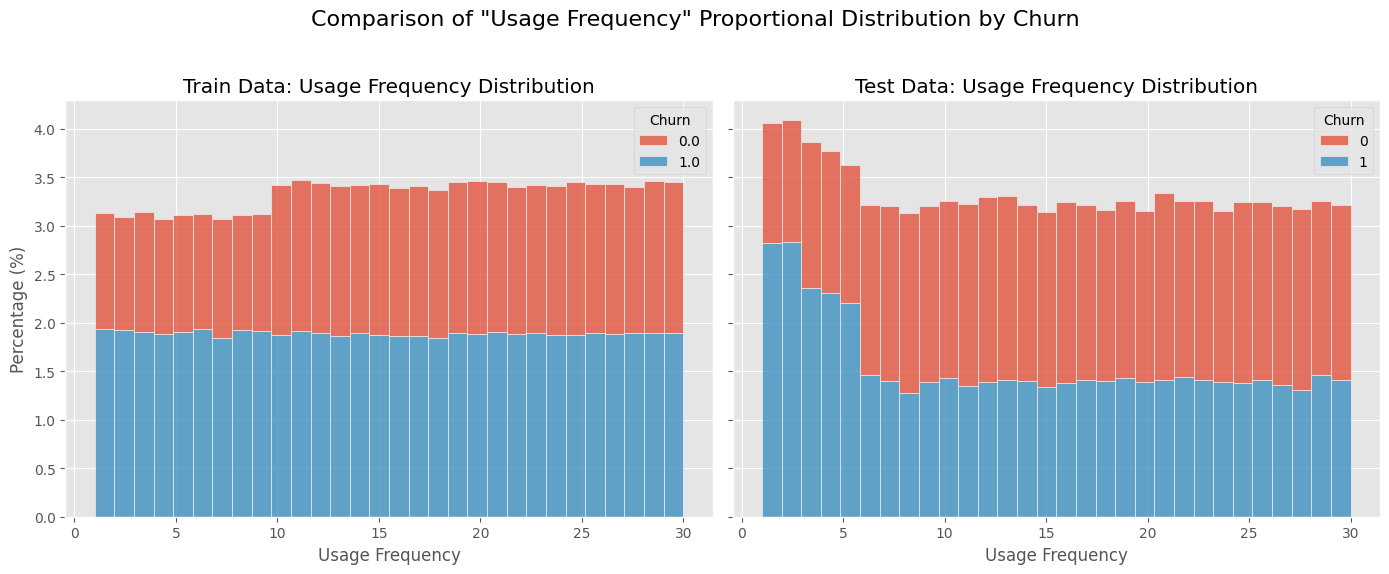

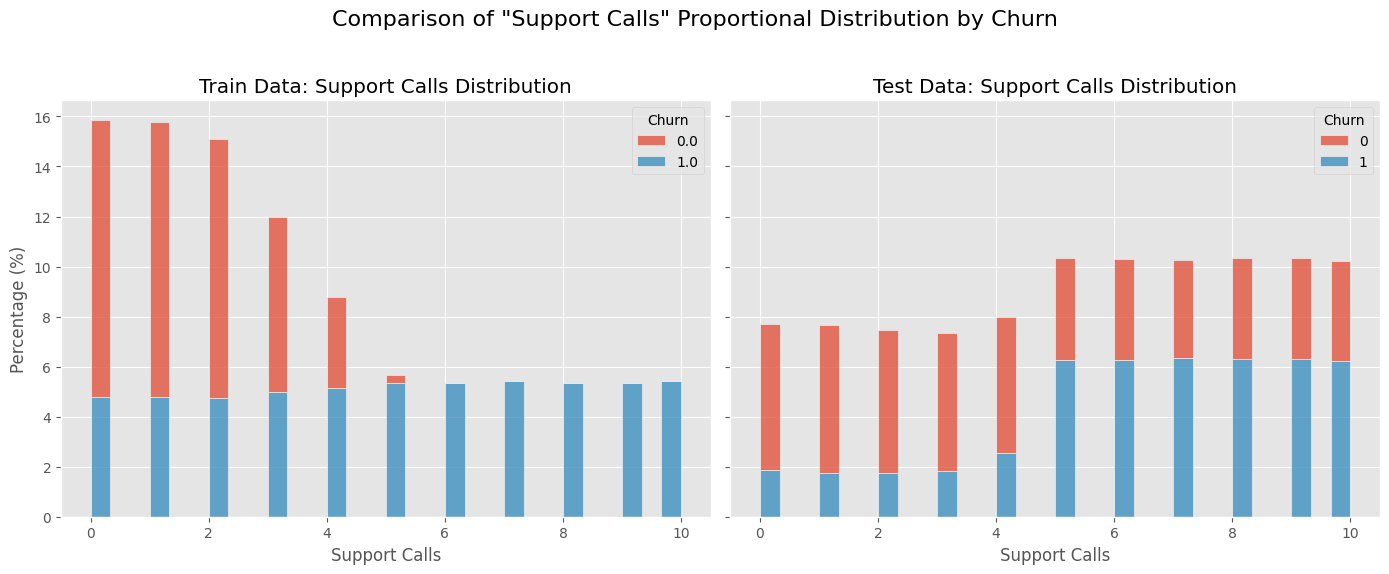

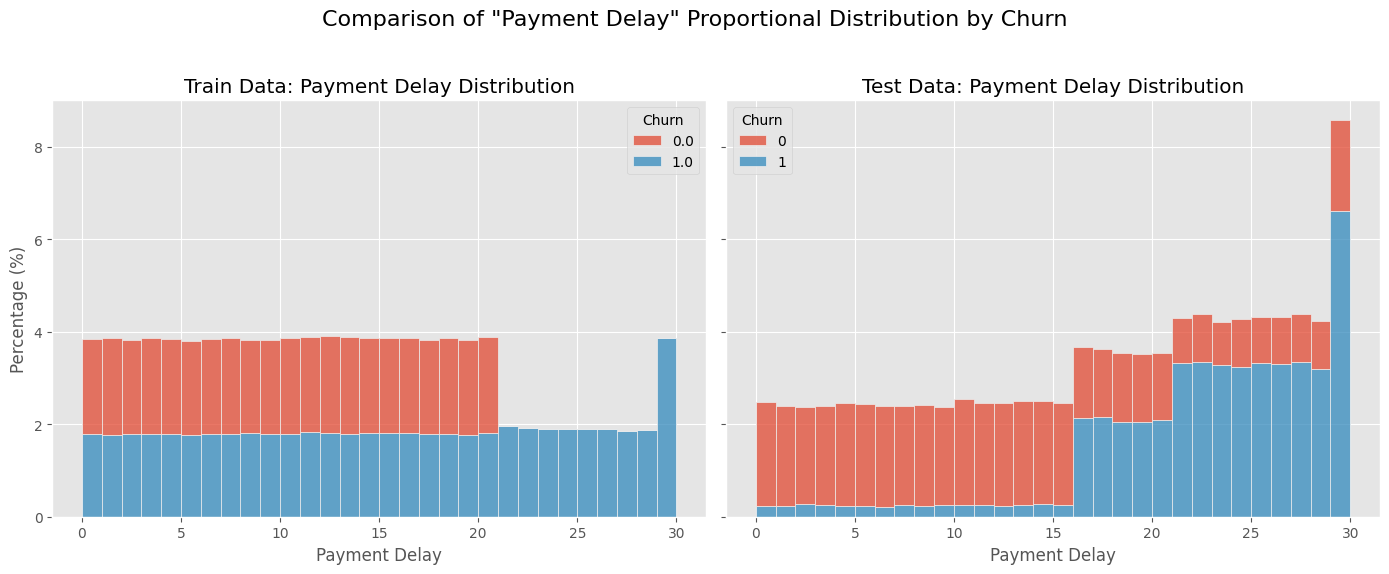

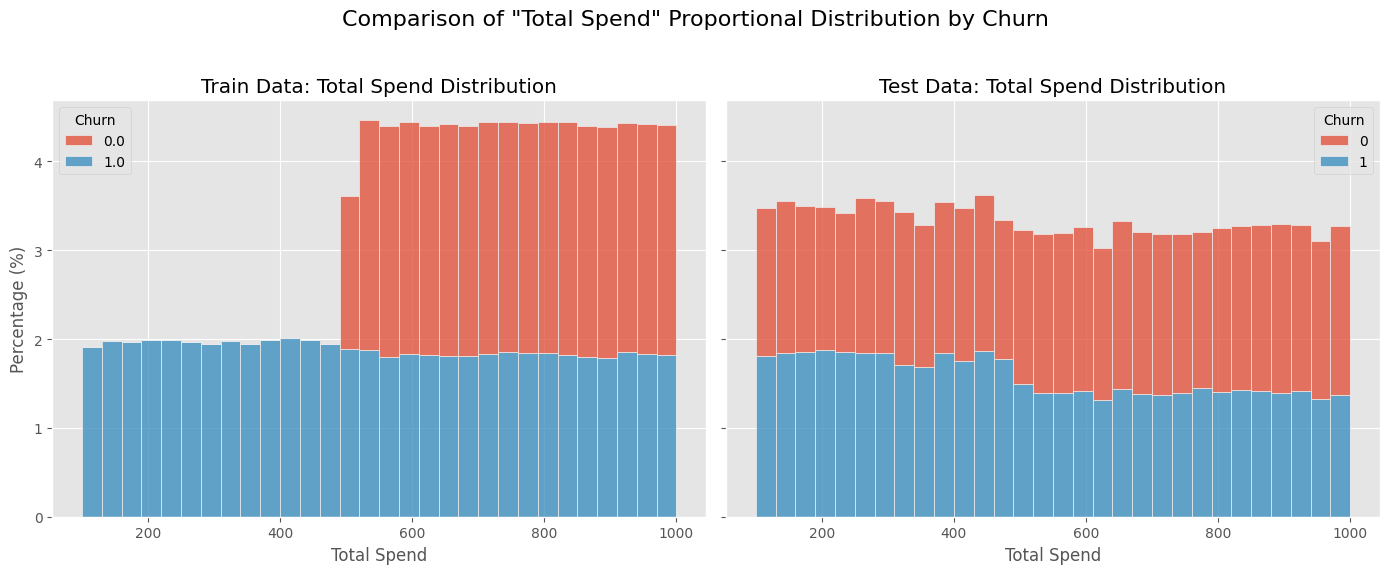

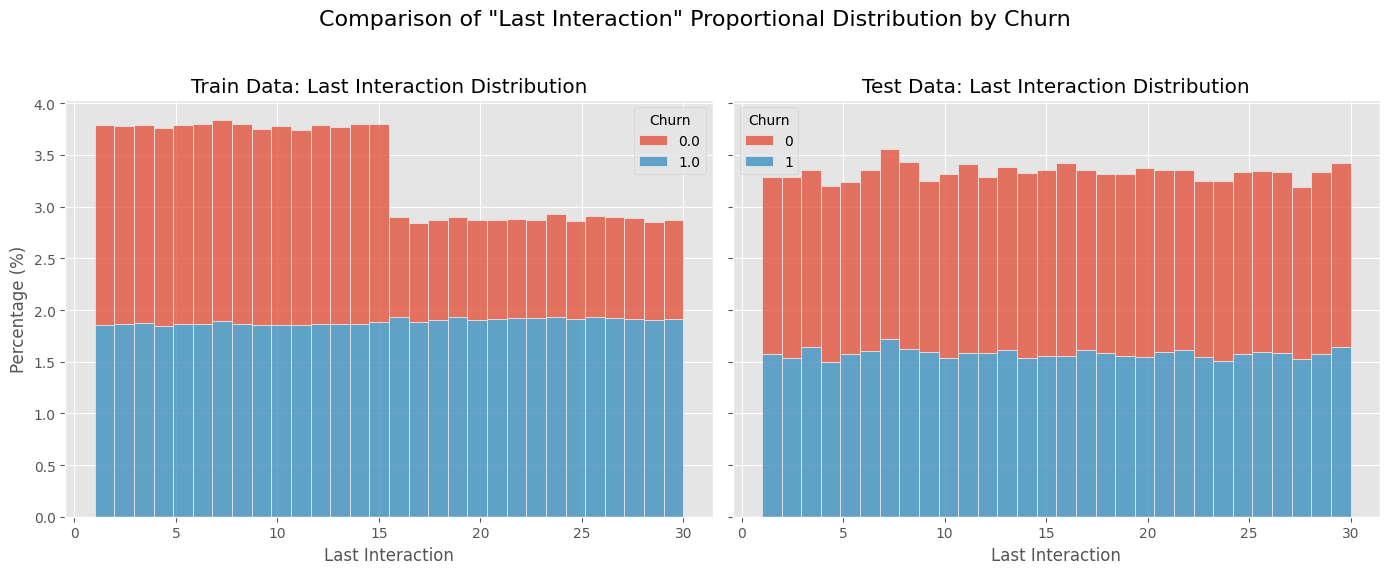

In [161]:

for col in df_numerical.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) 
    

    sns.histplot(data=df_train, x=col, hue="Churn", bins=30, multiple="stack", 
                 stat='percent', ax=axes[0]) 
    axes[0].set_title(f'Train Data: {col} Distribution')
    axes[0].set_ylabel('Percentage (%)') 
  
    sns.histplot(data=df_test, x=col, hue="Churn", bins=30, multiple="stack", 
                 stat='percent', ax=axes[1]) 
    axes[1].set_title(f'Test Data: {col} Distribution')
    axes[1].set_ylabel('Percentage (%)')

    fig.suptitle(f'Comparison of "{col}" Proportional Distribution by Churn', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Insights from Numerical Columns

- **Age**  
  - All customers aged **over 50 years** have a very high likelihood of **churning**.

- **Support Calls**  
  - Customers with **more than 4 support calls** are mostly **churned**.  
  - If the number of support calls is **less than 5**, they are generally **not churned**.

- **Payment Delay**  
  - Any customer who delayed payment **more than 20 days** is likely to **churn**.

- **Total Spend**  
  - Customers who spent **less than 500** have a **high probability of churn**.


In [131]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,27.0,Male,14.0,28.0,3.0,16.0,Standard,Monthly,862.00,9.0,1.0
1,40.0,Male,19.0,2.0,8.0,28.0,Standard,Monthly,620.81,21.0,1.0
2,27.0,Female,57.0,3.0,0.0,24.0,Standard,Annual,915.00,26.0,1.0
3,40.0,Male,21.0,14.0,0.0,11.0,Basic,Annual,592.83,9.0,0.0
4,39.0,Male,58.0,4.0,2.0,8.0,Standard,Monthly,694.00,15.0,1.0


In [178]:
df_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [179]:
df_categorical.isna().sum()

Gender               0
Subscription Type    0
Contract Length      0
dtype: int64

In [193]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
for col in df_categorical:
    df_train[col] = lbl.fit_transform(df_train[col])
    df_test[col] = lbl.transform(df_test[col]) 

In [201]:
df_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,27.0,1,14.0,28.0,3.0,16.0,2,1,862.00,9.0,1.0
1,40.0,1,19.0,2.0,8.0,28.0,2,1,620.81,21.0,1.0
2,27.0,0,57.0,3.0,0.0,24.0,2,0,915.00,26.0,1.0
3,40.0,1,21.0,14.0,0.0,11.0,0,0,592.83,9.0,0.0
4,39.0,1,58.0,4.0,2.0,8.0,2,1,694.00,15.0,1.0


In [195]:
df_test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,55,1,20,24,4,6,2,1,635,25,0
1,28,1,27,30,4,5,1,2,631,10,0
2,65,0,60,17,7,16,1,2,314,1,1
3,53,1,47,16,8,7,1,0,527,13,0
4,32,1,56,5,7,15,1,0,236,25,0


In [204]:
processed_dir = os.path.join(project_root, "notebooks", "data")
df_train.to_csv(os.path.join(processed_dir, "train_preprocessed.csv"), index=False)
df_test.to_csv(os.path.join(processed_dir, "test_preprocessed.csv"), index=False)

In [137]:

outliers_count = {}

for col in df_numerical:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    outliers = (df_train[col] < lower_bound) | (df_train[col] > upper_bound)
    outliers_count[col] = outliers.sum()  


outliers_df = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Num_of_Outliers'])
print(outliers_df)


                  Num_of_Outliers
Age                             0
Tenure                          0
Usage Frequency                 0
Support Calls                   0
Payment Delay                   0
Total Spend                     0
Last Interaction                0


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_train.drop(columns=["Churn"])
y = df_train["Churn"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42 , shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [198]:
X_train_scaled.shape

(308582, 10)

In [199]:
X_valid_scaled.shape

(132250, 10)

In [200]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns=X_valid.columns, index=X_valid.index)


X_train_scaled_df.to_csv(os.path.join(project_root , "notebooks","data", "X_train_scaled.csv"), index=False)
y_train.to_csv(os.path.join(project_root , "notebooks","data", "y_train.csv"), index=False)

X_valid_scaled_df.to_csv(os.path.join(project_root , "notebooks","data", "X_valid_scaled.csv"), index=False)
y_valid.to_csv(os.path.join(project_root , "notebooks","data", "y_valid.csv"), index=False)


In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay , classification_report

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
    
y_pred = rf.predict(X_valid_scaled)
    
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("=== Validation Results ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))


=== Validation Results ===
Accuracy:  0.9998
Precision: 1.0000
Recall:    0.9996
F1-score:  0.9998

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57189
         1.0       1.00      1.00      1.00     75061

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250



In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay , classification_report

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train_scaled, y_train)
    
y_pred = lr.predict(X_valid_scaled)
    
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
print("=== Validation Results ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_valid, y_pred))


=== Validation Results ===
Accuracy:  0.8531
Precision: 0.9054
Recall:    0.8277
F1-score:  0.8648

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84     57189
         1.0       0.91      0.83      0.86     75061

    accuracy                           0.85    132250
   macro avg       0.85      0.86      0.85    132250
weighted avg       0.86      0.85      0.85    132250



In [146]:
X_test = df_test.drop(columns=["Churn"]) 
y_test = df_test["Churn"]


In [152]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X_test_scaled = scaler.transform(X_test)
y_test_pred = rf.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("=== Test Results ===")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-score:  {test_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))




=== Test Results ===
Accuracy:  0.5036
Precision: 0.4883
Recall:    0.9986
F1-score:  0.6558

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



In [144]:
df_test["Churn"].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64